In [7]:
import numpy as np
import pandas as pd
import cv2
from IPython.display import display
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf

In [8]:
class CFG:
    target_cols=['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged',       'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present']

In [3]:
train=pd.read_csv("../input/ranzcr-clip-catheter-line-classification/train.csv")
pred=pd.read_csv("dense_pred.csv")

In [4]:
def get_mse(y_true,y_pred):
    mse=0
    for true_value,pred_value in zip(y_true,y_pred):
        mse+=(true_value-pred_value)**2
    return mse

In [5]:
train_values=train[CFG.target_cols].values
pred_values=pred[CFG.target_cols].values

In [6]:
results_list=[]
for train_row,pred_row in zip(train_values,pred_values):
    results_list.append(get_mse(train_row,pred_row))

results_df=pd.DataFrame(results_list)
results_df=pd.concat([train["StudyInstanceUID"],results_df],axis=1)
results_df.columns=["StudyInstanceUID","mse"]

In [7]:
for idx,row in tqdm(results_df.iterrows()):
    uid=row["StudyInstanceUID"]
    file_bytes=tf.io.read_file(f"../input/ranzcr-clip-catheter-line-classification/train/{uid}.jpg")
    img_tf=tf.io.decode_jpeg(file_bytes)
    img_array=img_tf.numpy()
    mean=np.mean(img_array)
    std=np.std(img_array)
    results_df.loc[idx,"mean"]=mean
    results_df.loc[idx,"std"]=std

results_df.to_csv("img_luminance.csv",index=False)

30083it [44:50, 11.18it/s]


In [9]:
luminance=pd.read_csv("img_luminance.csv")
luminance

StudyInstanceUID       mse  \
0      1.2.826.0.1.3680043.8.498.26697628953273228189...  0.386830   
1      1.2.826.0.1.3680043.8.498.46302891597398758759...  0.033229   
2      1.2.826.0.1.3680043.8.498.23819260719748494858...  0.410857   
3      1.2.826.0.1.3680043.8.498.68286643202323212801...  0.308117   
4      1.2.826.0.1.3680043.8.498.10050203009225938259...  0.002469   
...                                                  ...       ...   
30078  1.2.826.0.1.3680043.8.498.74257566841157531124...  0.765004   
30079  1.2.826.0.1.3680043.8.498.46510939987173529969...  0.166953   
30080  1.2.826.0.1.3680043.8.498.43173270582850645437...  2.055025   
30081  1.2.826.0.1.3680043.8.498.95092491950130838685...  0.231505   
30082  1.2.826.0.1.3680043.8.498.99518162226171269731...  0.000692   

             mean        std  
0      139.877758  38.440663  
1      121.018952  41.151246  
2      128.251808  67.799834  
3      116.752400  65.498643  
4      118.346435  47.740703  
...           ...        ...  
30078  156.107686  49.375537  
30079  112.521075  53.021101  
30080  115.881849  67.356332  
30081  131.837406  52.248537  
30082  120.108066  72.077695  

[30083 rows x 4 columns]

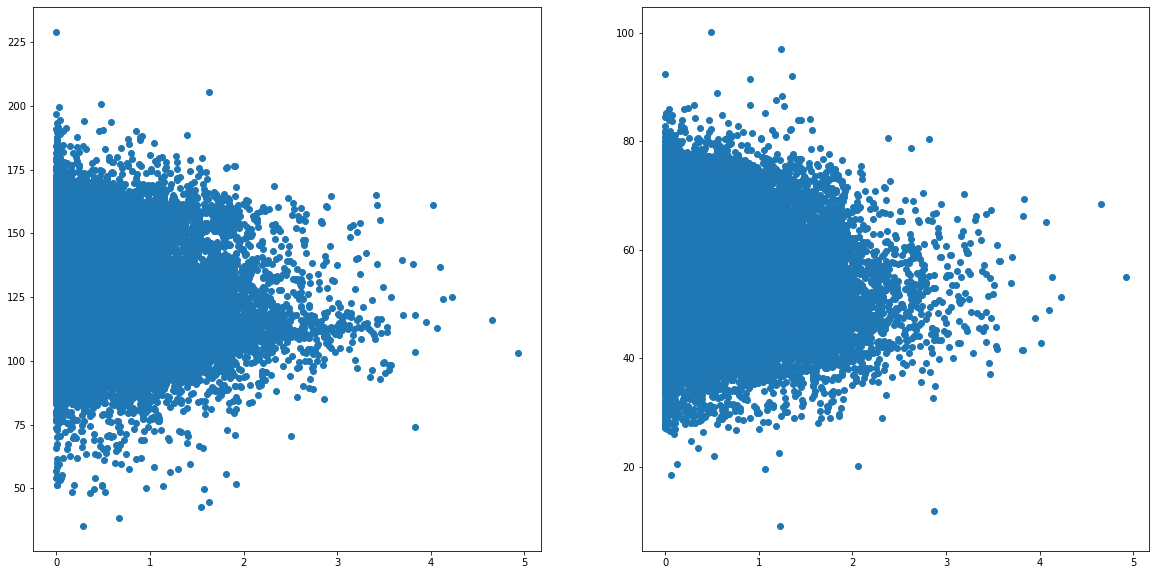

In [15]:
fig,axes=plt.subplots(1,2,figsize=(20,10))
axes[0].scatter(luminance["mse"],luminance["mean"])
axes[1].scatter(luminance["mse"],luminance["std"])